### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### Sample dataset

In [3]:
data = {
    'Date': pd.date_range(start='2025-09-01', periods=10, freq='D'),
    'Close': [100, 102, 101, 105, 107, 106, 108, 110, 111, 115],
    'Volume': [2000, 2100, 2050, 2200, 2300, 2250, 2400, 2500, 2450, 2600]
}

df = pd.DataFrame(data)
print(df)

        Date  Close  Volume
0 2025-09-01    100    2000
1 2025-09-02    102    2100
2 2025-09-03    101    2050
3 2025-09-04    105    2200
4 2025-09-05    107    2300
5 2025-09-06    106    2250
6 2025-09-07    108    2400
7 2025-09-08    110    2500
8 2025-09-09    111    2450
9 2025-09-10    115    2600


### Convert Date to datetime

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

### Visualize stock prices over time

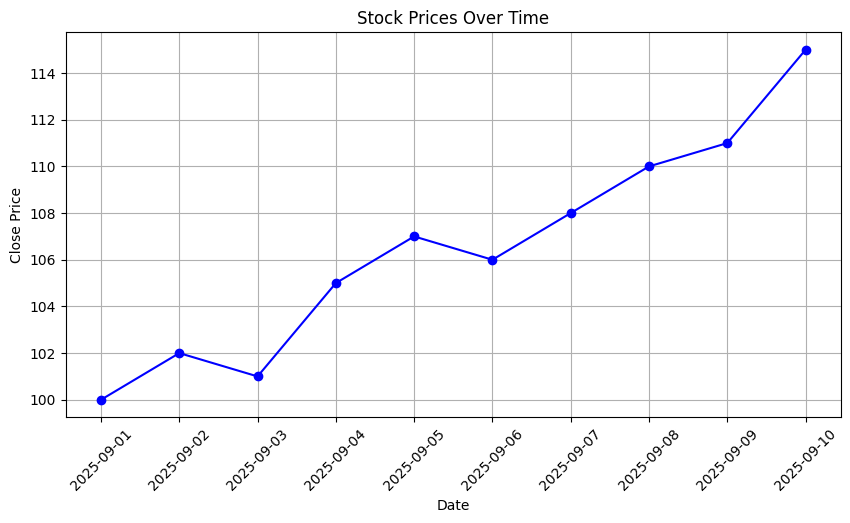

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='blue')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Regression plot - Price vs Volume

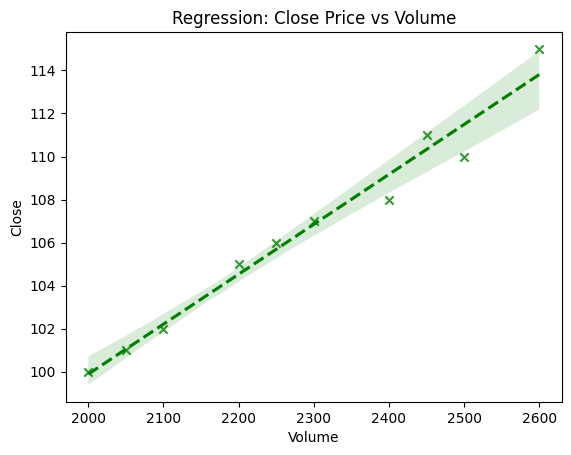

In [9]:
sns.regplot(x='Volume', y='Close', data=df, color='green', marker='x', line_kws={'linestyle':'--'})
plt.title('Regression: Close Price vs Volume')
plt.show()

### Residual plot

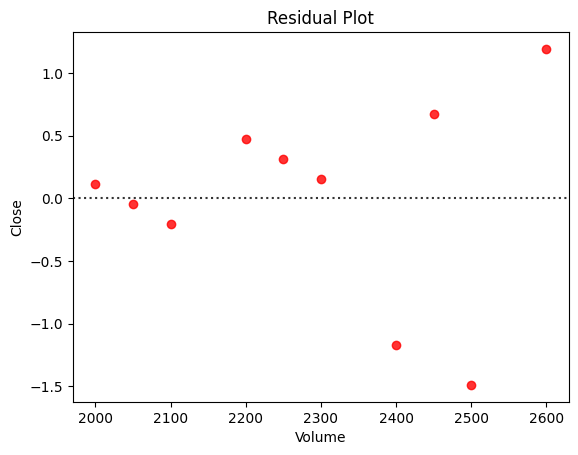

In [10]:
sns.residplot(x='Volume', y='Close', data=df, color='red')
plt.title('Residual Plot')
plt.show()

### Fit Linear Regression to predict Close Price from Volume

In [11]:
X = df[['Volume']]
y = df['Close']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

### Evaluate the model

In [12]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.59
R-squared: 0.97


### Forecast next 5 days stock prices

In [13]:
future_volume = np.array([2650, 2700, 2750, 2800, 2850]).reshape(-1, 1)
future_pred = model.predict(future_volume)
future_dates = pd.date_range(start='2025-09-11', periods=5, freq='D')

forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_pred})
print(forecast_df)

        Date  Predicted_Close
0 2025-09-11       114.969199
1 2025-09-12       116.129363
2 2025-09-13       117.289528
3 2025-09-14       118.449692
4 2025-09-15       119.609856


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Plot forecasted prices with historical prices

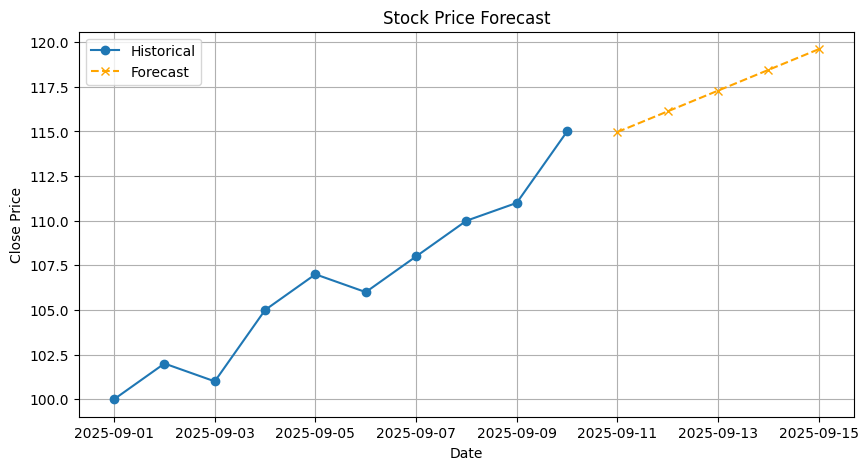

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], marker='o', label='Historical')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Close'], marker='x', linestyle='--', color='orange', label='Forecast')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### Moving averages

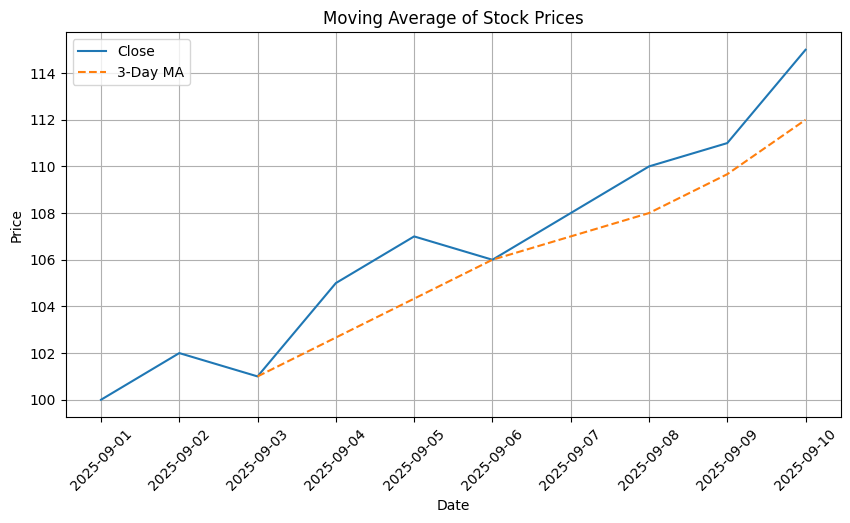

In [16]:
df['MA_3'] = df['Close'].rolling(window=3).mean()
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_3'], label='3-Day MA', linestyle='--')
plt.title('Moving Average of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()